In [1]:
test_name=['202503.csv','202502.csv','202501.csv','202412.csv','202411.csv','202410.csv','202409.csv','202408.csv','202407.csv']
train_name=['202406.csv','202405.csv','202404.csv','202403.csv','202402.csv','202401.csv',
            '202312.csv','202311.csv','202310.csv','202309.csv','202308.csv','202307.csv','202306.csv','202305.csv','202304.csv','202303.csv','202302.csv','202301.csv',
            '202212.csv','202211.csv','202210.csv','202209.csv','202208.csv','202207.csv','202206.csv','202205.csv','202204.csv','202203.csv','202202.csv','202201.csv',
            '202112.csv','202111.csv','202110.csv','202109.csv','202108.csv','202107.csv','202106.csv','202105.csv','202104.csv','202103.csv','202102.csv','202101.csv',
            ]
import warnings
warnings.filterwarnings("ignore")

In [61]:
import pandas as pd
# report 缺失情况
def report_missing_data(df):
    missing_data = df.isnull().sum()
    missing_data = missing_data[missing_data > 0]
    if not missing_data.empty:
        print("Missing data report:")
        print(missing_data)
    else:
        print("No missing data found.")
for i in test_name+train_name:
    df = pd.read_csv(i)
    print(f"Report for {i}:")
    report_missing_data(df)

Report for 202503.csv:
Missing data report:
R&D                     52
OperatingProfitRatio    23
ROA                     46
GrossProfit             46
PEG                      6
dtype: int64
Report for 202502.csv:
Missing data report:
R&D                     50
OperatingProfitRatio    22
ROA                     46
GrossProfit             46
PEG                      6
dtype: int64
Report for 202501.csv:
Missing data report:
VMA                     300
R&D                      50
OperatingProfitRatio     22
ROA                      46
GrossProfit              46
PEG                       6
dtype: int64
Report for 202412.csv:
Missing data report:
R&D                     50
OperatingProfitRatio    22
ROA                     46
GrossProfit             46
PEG                      6
dtype: int64
Report for 202411.csv:
Missing data report:
VMA                     300
R&D                      51
OperatingProfitRatio     24
ROA                      46
GrossProfit              46
PEG            

In [2]:
from sklearn.impute import KNNImputer
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()

imputer = KNNImputer(n_neighbors=5)
yname='rank10_next'  # 目标变量名称
def process(df):
    df1 = df.dropna(thresh=20, axis=0)
    df1= df1.dropna(subset=[yname],axis=0)
    l=['StockCode','StockName','VMA','rank2','rank10_next','rank2_next','MonthlyReturn_next']
    x = df1.drop(columns=l)
    
    x1 = imputer.fit_transform(x)
    x = pd.DataFrame(x1, columns=x.columns)
    #print nan number of each column
    #print(x.isnull().sum())
    
    x2 = scaler.fit_transform(x)
    x = pd.DataFrame(x2, columns=x.columns,index=df1.index)  # 这里可能出错！
    y = df1[yname]
    
    return pd.concat([x, y], axis=1),df1

In [2]:
import pandas as pd
df_train=pd.DataFrame()
df_test=pd.DataFrame()
# read all train files and add to df_train
for i in train_name:
    df=pd.read_csv(i)
    df,_=process(df)
    df_train=pd.concat([df_train,df],axis=0)
for i in test_name:
    df=pd.read_csv(i)
    df,_=process(df)
    df_test=pd.concat([df_test,df],axis=0)
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)


NameError: name 'process' is not defined

In [64]:
x_train=df_train.drop(columns=[yname])
y_train=df_train[yname]
x_test=df_test.drop(columns=[yname])
y_test=df_test[yname]

#save x_train to csv
x_train.to_csv('x_train.csv',index=False)

x_train


,MonthlyTurnoverRate,MonthlyTradingAmount,MonthlyTradingVolume,ATR,ADTM,AssetTurnover,NetProfit,R&D,BBIBOLL,MACD,...,EPS,ROC,MASS,BBI,PB,PE,PEG,VR,PSY,WVAD
0,-1.134938,-0.534558,-0.077186,-0.458836,0.577593,-1.288432,0.655936,-0.132354,-0.342926,0.234863,...,-0.107149,0.639267,0.073228,-0.342926,-0.985570,-0.244862,-0.175736,1.668357,0.612559,0.117666
1,-0.749348,-0.627890,-0.687184,-0.245068,-0.838771,-0.895602,-0.322350,-0.448454,-0.097315,-0.019903,...,-0.278729,-0.447114,0.723244,-0.097315,-0.353245,0.982281,-0.097581,-0.837819,-0.676392,-0.540550
2,-0.701634,-0.662039,2.159331,-0.486043,-0.486677,-0.217795,-0.357681,-0.455067,-0.410873,0.214272,...,-0.429899,-0.349315,0.923467,-0.410873,-0.647632,1.561470,-0.091573,-0.973060,-2.886023,0.656830
3,-0.311873,-0.300732,0.215505,-0.276162,0.201709,-0.195428,-0.121980,-0.280474,-0.332503,0.236027,...,-0.287774,0.277438,-0.190797,-0.332503,-0.052365,-0.070095,-0.147897,0.223658,0.428423,0.173618
4,-0.805177,-0.668570,-0.192162,-0.454949,0.681821,-1.279700,0.308120,0.039950,-0.360686,0.192059,...,-0.037611,0.071899,-0.075906,-0.360686,-0.995734,-0.286907,-0.091118,0.080201,0.428423,0.006751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,-0.737313,0.356233,-0.537170,1.798285,0.961852,0.349095,-0.141650,-0.077518,2.239469,1.956376,...,1.453090,0.289325,0.518811,2.239469,2.325824,0.083495,0.285852,0.634660,1.589461,-0.259763
294,-0.321464,-0.043053,-0.561127,4.087617,1.331124,1.266128,-0.310792,-0.489473,3.416662,2.244666,...,1.626273,1.116565,-0.030755,3.416662,4.931761,0.510723,-0.030706,1.400592,1.743048,-0.261855
295,0.187018,-0.732074,-0.569101,1.026163,-0.285017,-0.137628,-0.314839,-0.497214,0.376299,-0.713139,...,0.307300,-0.805871,-0.891582,0.376299,0.628822,-0.103608,0.419331,-0.944197,0.360764,-0.309440
296,0.360626,-0.443774,-0.572758,5.387465,0.283070,-0.680603,-0.329964,-0.518894,4.116618,5.837446,...,0.801923,-0.107966,-0.336667,4.116618,2.001716,0.826236,0.061364,0.750190,-0.867933,-0.317746


In [3]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import TimeSeriesSplit
import pandas as pd

# 假设 x_train_scaled 是标准化后的 DataFrame，y_train 是分类标签（1-10）
def train_model(x_train,y_train,mod=1):
    X_train = x_train.values  # 转为 numpy 数组
    Y_train = y_train.values.ravel()  # 确保 y 是 1D 数组


    if mod==1:
        model = xgb.XGBClassifier(
            objective="multi:softmax",  # 多分类目标函数
            num_class=10,             # 类别数（必须设置）
            n_estimators=3000,         # 树的数量
            max_depth=1,              # 树的最大深度
            learning_rate=0.02,        # 学习率
            subsample=0.75,           # 每棵树使用的样本比例
            colsample_bytree=0.9,     # 每棵树使用的特征比例       
            eval_metric="mlogloss", # 多分类的评估指标
            
        )

    elif mod==2:
        model = RandomForestClassifier(
            n_estimators=6000,
            max_depth=5,  # 需要调参
            min_samples_leaf=30,
            max_samples=0.8,
            max_features='sqrt',
            
            n_jobs=-1
        )
    elif mod==3:
        

        model = lgb.LGBMClassifier(
            objective='multiclass',
            num_class=10,
            n_estimators=4000,
            max_depth=1,
            learning_rate=0.02,
            subsample=0.75,
            colsample_bytree=0.8,
            metric='multi_logloss'
        )
    elif mod==4:

        model = MLPClassifier(
            hidden_layer_sizes=(128, 64),
            activation='relu',
            solver='adam',
            learning_rate_init=0.002,
            max_iter=500
        )
    elif mod==5:
        base_learners = [
            ('rf',  RandomForestClassifier(
                        n_estimators=3000, max_depth=5,
                        min_samples_leaf=30, max_samples=0.8,
                        max_features='sqrt', n_jobs=-1)),
            ('lr',  LogisticRegression(C=1,max_iter=1000,solver='lbfgs')),
            ('mlp', MLPClassifier(
                        hidden_layer_sizes=(128, 64),
                        activation='relu',
                        solver='adam',
                        learning_rate_init=0.002,
                        max_iter=500))
        ]
        
        model = StackingClassifier(
            estimators=base_learners,
            final_estimator=LogisticRegression(C=1, max_iter=1000, solver='lbfgs'),
            n_jobs=-1
        )    
    elif mod==6:
        model =LogisticRegression(C=1, max_iter=1000, solver='lbfgs')

    # 训练模型
    model.fit(X_train, Y_train)

    return model

In [4]:
from sklearn.metrics import mean_absolute_error
from scipy.stats import spearmanr

all=test_name+train_name
all=all[::-1]  # reverse the order to make sure the latest data is at the top
return_data=pd.DataFrame()
accuracy_list = []
mse_list = []
spear_list = []
ic_list = []
for i in range(6, len(all)):
    test_name = all[i]
    train_names = all[i-6:i]
    print(f"Processing {test_name} with training data from {train_names}")
    df_train=pd.DataFrame()
    for i in train_names:
        df=pd.read_csv(i)
        df,_=process(df)
        df_train=pd.concat([df_train,df],axis=0)
    df_train.dropna(inplace=True)
    x_train=df_train.drop(columns=[yname])
    y_train=df_train[yname]
    model= train_model(x_train, y_train,mod=6)
    
    
    df=pd.read_csv(test_name)
    df,dfcom=process(df)
    mr=dfcom['MonthlyReturn_next']
    # winsorize mr
    mr = mr.clip(lower=mr.quantile(0.01), upper=mr.quantile(0.99), axis=0)
    
    #df=df.dropna(subset=[yname],axis=0)
    x=df.drop(columns=[yname])
    y=df[yname]
    # for every sample in x, give me the weighted sum of predicted probabilities
    x = x.values  # 转为 numpy 数组
    y_pred= model.predict(x)  # 预测类别
    y_pred_prob = model.predict_proba(x)
    y_pred_prob = pd.DataFrame(y_pred_prob,index=df.index)  # 转为 DataFrame
    y_pred_prob.columns = ['rank0','rank_1','rank_2','rank_3','rank_4','rank_5','rank_6','rank_7','rank_8','rank_9']
    y_pred_prob['score']= y_pred_prob['rank_1']*1 + y_pred_prob['rank_2']*2 + y_pred_prob['rank_3']*3 + y_pred_prob['rank_4']*4 + y_pred_prob['rank_5']*5 + y_pred_prob['rank_6']*6 + y_pred_prob['rank_7']*7 + y_pred_prob['rank_8']*8 + y_pred_prob['rank_9']*9 
    fil=pd.concat([mr,y_pred_prob['score']],axis=1)
    fil['rank'] = pd.qcut(fil['score'], 10, labels=False)
    
    accuracy=accuracy_score(y, fil['rank'])
    accuracy_list.append(accuracy)
    
    mse= mean_absolute_error(y, fil['rank'])
    mse_list.append(mse)
    
    spear, _ = spearmanr(y, fil['rank'])
    spear_list.append(spear)
    
    ic= fil['score'].corr(mr)
    ic_list.append(ic)
    # 计算每个类别的MonthlyReturn平均值
    mean_mr = fil.groupby('rank')['MonthlyReturn_next'].mean()
    mean_mr = pd.DataFrame(mean_mr)
    mean_mr.columns = [i]
    mean_mr = mean_mr.T
    print(f'Monyth: {test_name[:-4]}, Accuracy: {accuracy:.4f}, MSE: {mse:.4f}, Spearman Correlation: {spear:.4f}, Information Coefficient: {ic:.4f}')
    return_data = pd.concat([return_data, mean_mr], axis=0)

all=all[6:]
return_data.columns=['0','1','2','3','4','5','6','7','8','9']
return_data.index = [i[:-4] for i in all]


accuracy_df = pd.DataFrame(accuracy_list, index=[i[:-4] for i in all], columns=['accuracy'])
mse_df = pd.DataFrame(mse_list, index=[i[:-4] for i in all], columns=['mean_absolute_error'])
spear_df = pd.DataFrame(spear_list, index=[i[:-4] for i in all], columns=['spearman_correlation'])
ic_df = pd.DataFrame(ic_list, index=[i[:-4] for i in all], columns=['information_coefficient'])

ir=spear_df['spearman_correlation'].mean() / spear_df['spearman_correlation'].std()
print(f"Information Ratio: {ir:.4f}")
print(f'mean ic: {ic_df["information_coefficient"].mean():.4f}')
print(f'mean spear: {spear_df["spearman_correlation"].mean():.4f}')
return_data
    
    
    

Processing 202107.csv with training data from ['202101.csv', '202102.csv', '202103.csv', '202104.csv', '202105.csv', '202106.csv']
Monyth: 202107, Accuracy: 0.1197, MSE: 3.1796, Spearman Correlation: 0.0329, Information Coefficient: -0.0138
Processing 202108.csv with training data from ['202102.csv', '202103.csv', '202104.csv', '202105.csv', '202106.csv', '202107.csv']
Monyth: 202108, Accuracy: 0.1018, MSE: 3.3860, Spearman Correlation: -0.0540, Information Coefficient: -0.0274
Processing 202109.csv with training data from ['202103.csv', '202104.csv', '202105.csv', '202106.csv', '202107.csv', '202108.csv']
Monyth: 202109, Accuracy: 0.0976, MSE: 3.3868, Spearman Correlation: -0.0618, Information Coefficient: -0.0508
Processing 202110.csv with training data from ['202104.csv', '202105.csv', '202106.csv', '202107.csv', '202108.csv', '202109.csv']
Monyth: 202110, Accuracy: 0.1289, MSE: 2.8850, Spearman Correlation: 0.1953, Information Coefficient: 0.2335
Processing 202111.csv with training

,0,1,2,3,4,5,6,7,8,9
202107,7.261099,0.979529,4.309756,4.560928,-0.910385,7.554272,11.526819,8.707128,3.417808,5.722353
202108,-1.941643,2.336463,-2.577802,3.864297,2.674853,2.192867,0.957236,0.378043,0.784022,-3.771408
202109,1.421617,-0.367501,1.617105,3.372774,-0.531012,0.237922,2.217661,-0.745031,3.715829,-3.956400
202110,-5.848643,-3.305301,-2.890681,-1.179799,-0.276310,3.486908,-0.011468,6.765091,0.658895,0.488805
202111,2.104091,3.561062,4.314387,3.751891,4.975468,1.684419,4.896693,2.631874,3.039415,1.994358
202112,-11.577003,-6.752388,-7.457516,-6.930334,-2.587619,-8.533823,-8.195676,-9.282149,-8.004165,-8.406422
202201,11.239848,4.400976,5.573621,1.026836,0.538362,1.156423,2.359191,0.521960,3.625003,0.453077
202202,-8.826218,-10.776159,-9.132054,-7.742232,-3.237414,-8.478629,-7.818560,-7.139677,-5.705814,-10.363859
202203,-12.326374,-9.898563,-6.537207,-5.729355,-6.699960,-4.180152,-2.676558,0.163944,-1.546784,-2.160099
202204,7.662297,5.950584,2.378686,5.621414,5.186154,7.394938,6.297579,4.025399,1.893373,-0.077344


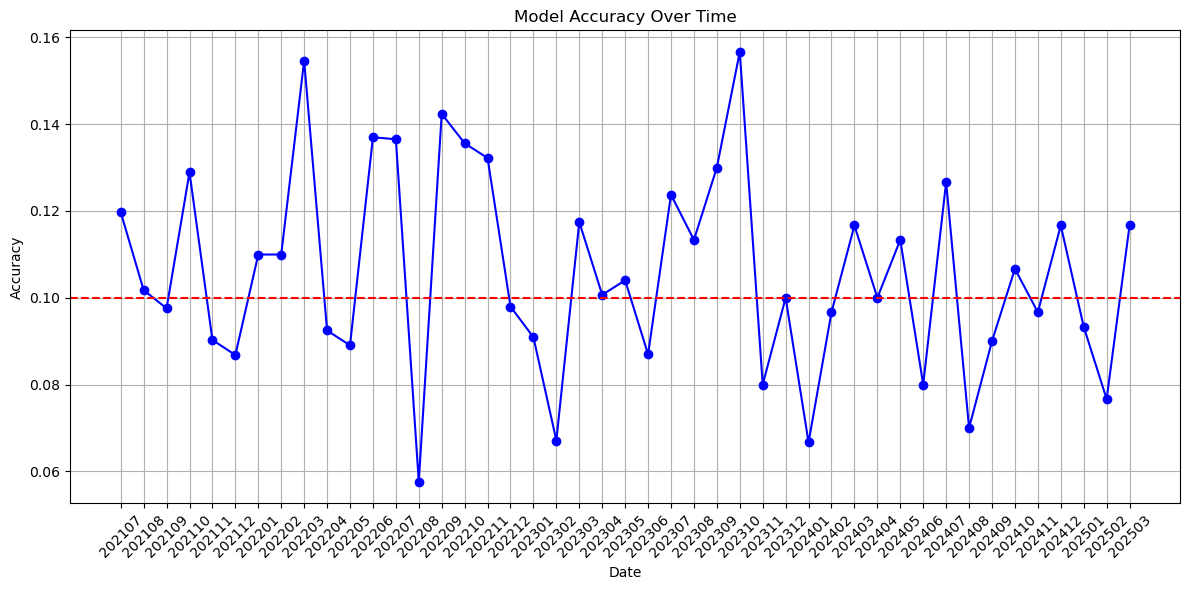

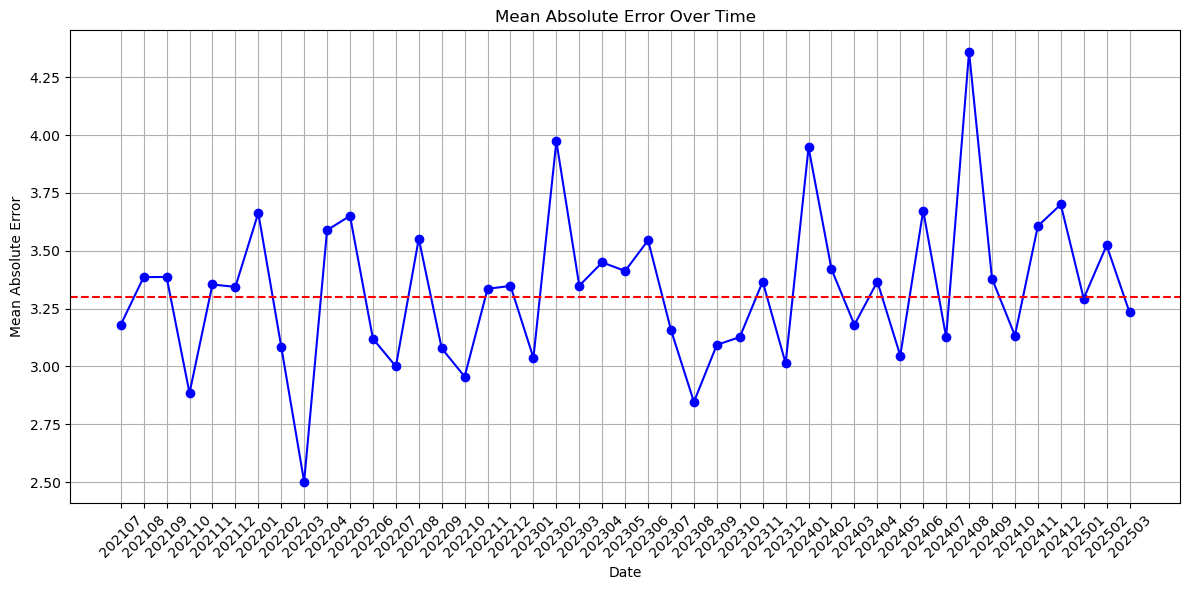

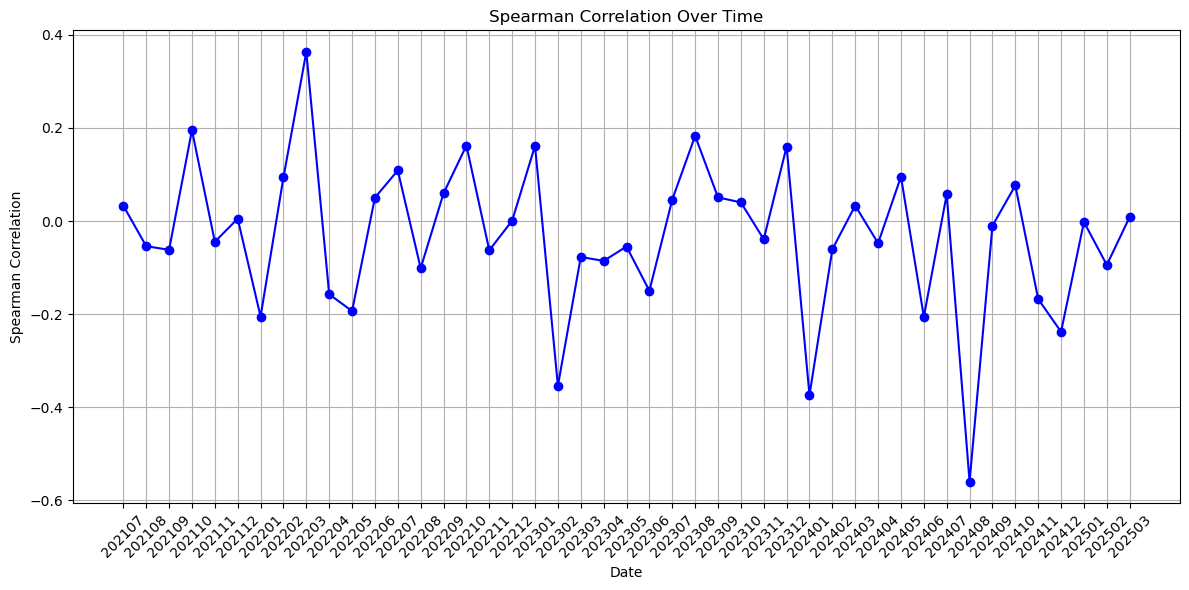

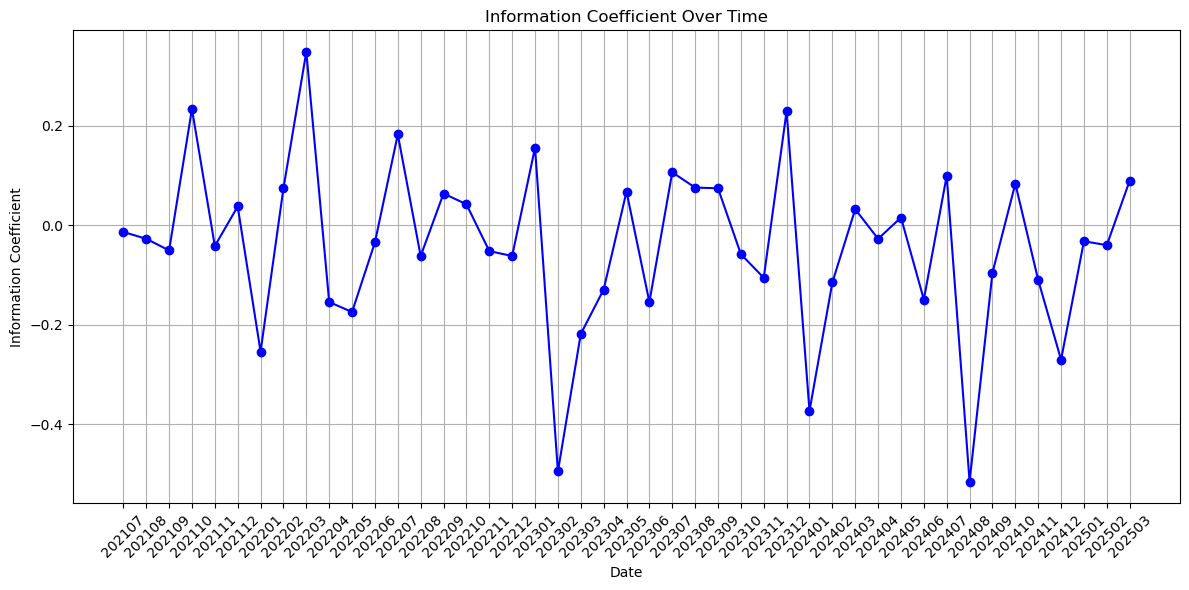

In [5]:
# draw accuracy_df
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(accuracy_df.index, accuracy_df['accuracy'], marker='o', linestyle='-', color='b')
# draw a 0.1 baseline
plt.axhline(y=0.1, color='r', linestyle='--', label='Baseline (0.1)')
# draw a 202407 vertical line
#plt.axvline(x='202407', color='g', linestyle='--', label='202407')
plt.title('Model Accuracy Over Time')
plt.xlabel('Date')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(mse_df.index, mse_df['mean_absolute_error'], marker='o', linestyle='-', color='b')
# draw a 202407 vertical line
#plt.axvline(x='202407', color='g', linestyle='--', label='202407')
plt.axhline(y=3.3, color='r', linestyle='--', label='Baseline')
plt.title('Mean Absolute Error Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Absolute Error')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(spear_df.index, spear_df['spearman_correlation'], marker='o', linestyle='-', color='b')
# draw a 202407 vertical line
#plt.axvline(x='202407', color='g', linestyle='--', label='202407')
plt.title('Spearman Correlation Over Time')
plt.xlabel('Date')
plt.ylabel('Spearman Correlation')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(ic_df.index, ic_df['information_coefficient'], marker='o', linestyle='-', color='b')
#plt.axvline(x='202407', color='g', linestyle='--', label='202407')
plt.title('Information Coefficient Over Time')
plt.xlabel('Date')
plt.ylabel('Information Coefficient')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
value=pd.DataFrame()
for i in ['0','1','2','3','4','5','6','7','8','9']:
    rate=return_data[i].values
    # 初始净值为1,rate为每个月的收益率，给我净值变化序列
    ori=1
    v=[]
    for j in rate:
        ori=ori*(100+j)/100
        v.append(ori)
    value[i]=v
value.index=return_data.index
value

,0,1,2,3,4,5,6,7,8,9
202108,1.014216,0.996325,1.016171,1.033728,0.994690,1.002379,1.022177,0.992550,1.037158,0.960436
202109,0.954898,0.963393,0.986797,1.021532,0.991941,1.037331,1.022059,1.059697,1.043992,0.965131
202110,0.974990,0.997700,1.029371,1.059859,1.041295,1.054804,1.072106,1.087586,1.075723,0.984379
202111,0.862116,0.930332,0.952606,0.986407,1.014350,0.964789,0.984240,0.986635,0.989621,0.901628
202112,0.959016,0.971276,1.005700,0.996536,1.019811,0.975946,1.007460,0.991785,1.025494,0.905713
202201,0.874371,0.866609,0.913859,0.919382,0.986796,0.893199,0.928691,0.920975,0.966982,0.811846
202202,0.766593,0.780827,0.854118,0.866707,0.920681,0.855862,0.903834,0.922485,0.952025,0.794309
202203,0.825332,0.827291,0.874435,0.915428,0.968429,0.919153,0.960754,0.959618,0.970050,0.793695
202204,0.897689,0.923330,0.924993,0.981322,1.044318,0.958791,1.018513,1.055271,0.996012,0.803543
202205,0.827473,0.906533,0.882335,0.927072,0.992512,0.916950,0.970168,1.003244,0.942072,0.743242


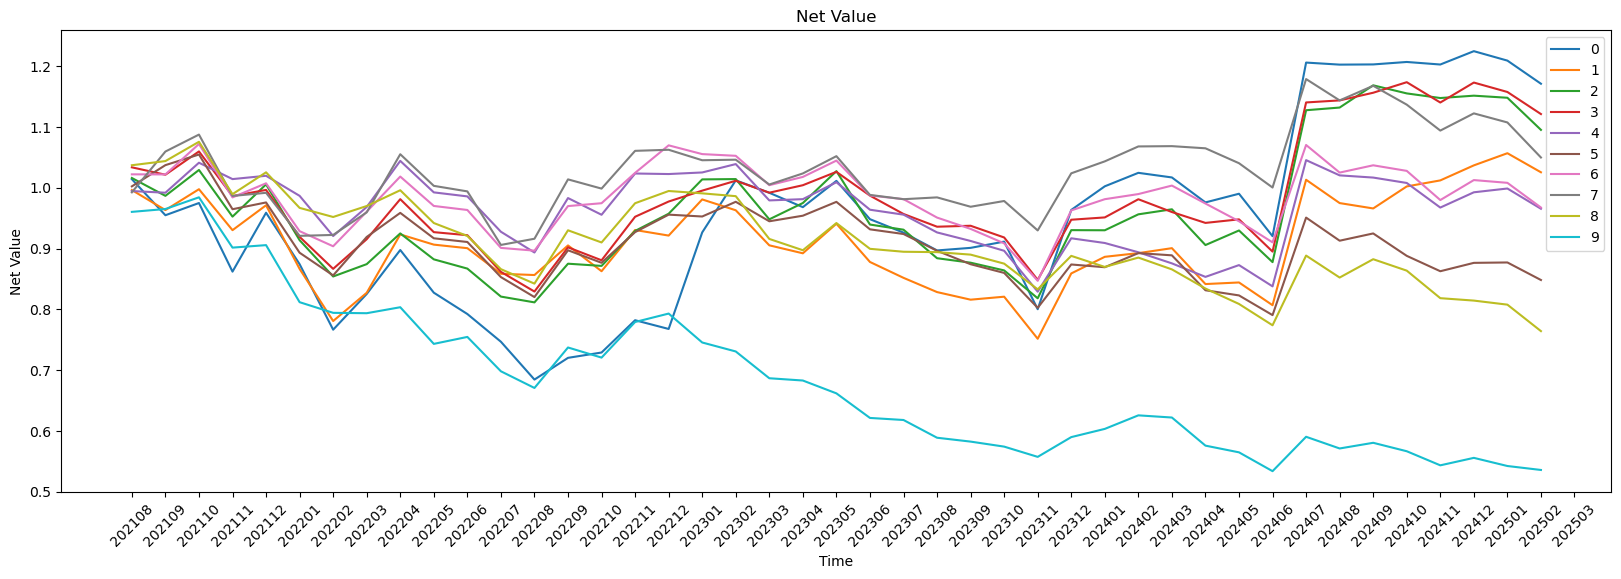

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 6))
# draw value[i] as a line chart
for i in ['0','1','2','3','4','5','6','7','8','9']:
    plt.plot(value[i], label=i)
# set x-axis ticks to be the index of return_data
plt.xticks(ticks=range(len(return_data.index)), labels=return_data.index, rotation=45)
plt.title('Net Value')
plt.xlabel('Time')
plt.ylabel('Net Value')
plt.legend()
plt.show()

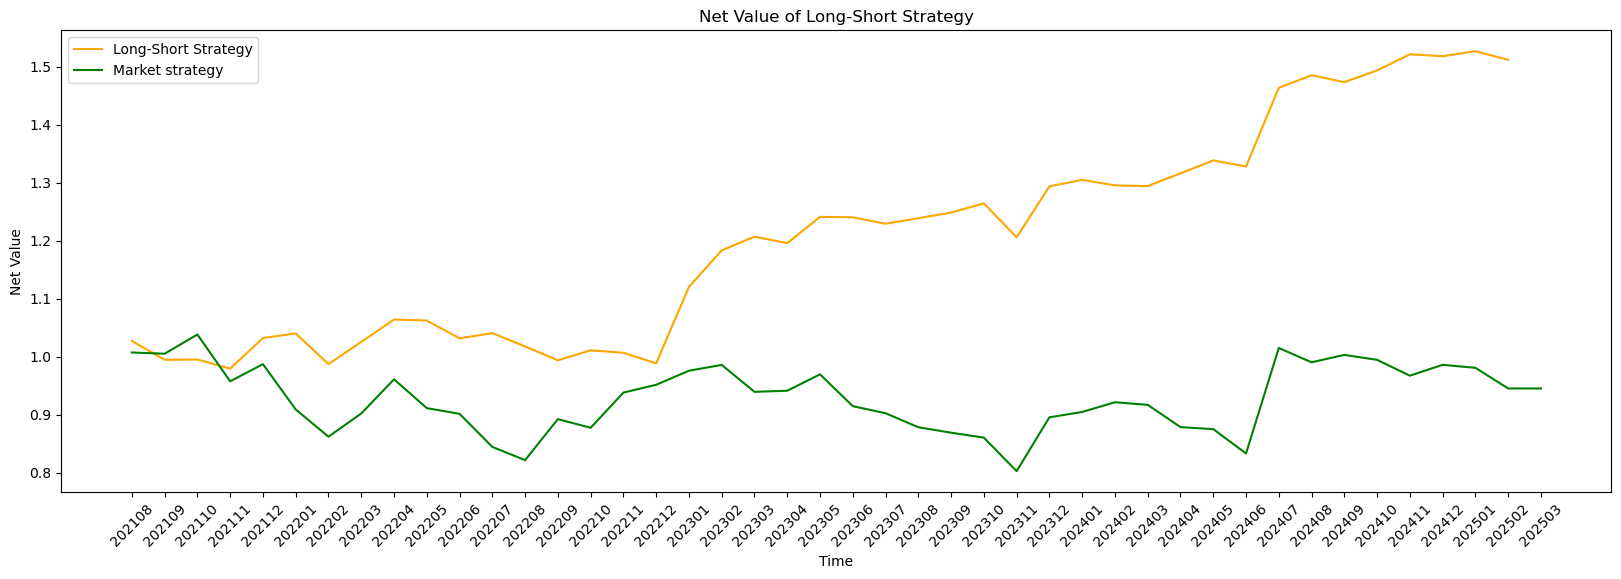

In [12]:
value_longshort=pd.DataFrame()
rate_ls=0.5* (-return_data['0'] + return_data['9'])  # long short strategy
ori=1
v_ls=[]
for j in rate_ls.values:
    ori=ori*(100-j)/100
    v_ls.append(ori)
value_longshort['long_short'] = v_ls
value_longshort.index = return_data.index

value_all=pd.DataFrame()
rate_all=return_data.sum(axis=1) / 10  # average return of all ranks
ori=1
v_all=[]   
for j in rate_all.values:
    ori=ori*(100+j)/100
    v_all.append(ori)
value_all['all'] = v_all
value_all.index = return_data.index
                             
plt.figure(figsize=(20, 6))
plt.plot(value_longshort['long_short'], label='Long-Short Strategy', color='orange')
plt.plot(value_all['all'], label='Market strategy', color='green')
plt.xticks(ticks=range(len(return_data.index)), labels=return_data.index, rotation=45)
plt.title('Net Value of Long-Short Strategy')
plt.xlabel('Time')
plt.ylabel('Net Value')
plt.legend()
plt.show()